In [1]:
# Load libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.feature_selection import chi2
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel(r'C:\Users\Usuario\Desktop\Python\EVALUACION\VF.xlsx')
df.head()

,anio,mes,de_dist_judi,de_depe_mpub,de_dist,de_depe_poli,id_unico,id_arreglado,fe_ing_caso,de_proced,...,de_edad,ti_sexo,de_cond,de_tipo_parte,gen,subgen,especif,de_estado,Feminicidio,Decision
0,2009,1,AREQUIPA,02º FISCALIA PROVINCIAL DE FAMILIA DE AREQUIPA,ALTO SELVA ALEGRE,COMISARIA DE ALTO SELVA ALEGRE,0150601070220090000010000,2009-1,2009-01-05 14:48:13.950,PARTE POLICIAL,...,NaN,M,OTROS,DENUNCIADO,MALTRATO FISICO,GENÉRICA,GENÉRICA,CON DEMANDA,SI,YES
1,2009,1,AREQUIPA,02º FISCALIA PROVINCIAL DE FAMILIA DE AREQUIPA,ALTO SELVA ALEGRE,COMISARIA DE ALTO SELVA ALEGRE,0150601070220090000010000,2009-1,2009-01-05 14:48:13.950,PARTE POLICIAL,...,NaN,M,OTROS,DENUNCIADO,MALTRATO SICOLOGICO,GENÉRICA,GENÉRICA,CON DEMANDA,SI,YES
2,2009,1,AREQUIPA,02º FISCALIA PROVINCIAL DE FAMILIA DE AREQUIPA,ALTO SELVA ALEGRE,COMISARIA DE ALTO SELVA ALEGRE,0150601070220090000010000,2009-1,2009-01-05 14:48:13.950,PARTE POLICIAL,...,NaN,F,OTROS,DENUNCIANTE,MALTRATO FISICO,GENÉRICA,GENÉRICA,CON DEMANDA,SI,YES
3,2009,1,AREQUIPA,02º FISCALIA PROVINCIAL DE FAMILIA DE AREQUIPA,ALTO SELVA ALEGRE,COMISARIA DE ALTO SELVA ALEGRE,0150601070220090000010000,2009-1,2009-01-05 14:48:13.950,PARTE POLICIAL,...,NaN,F,OTROS,DENUNCIANTE,MALTRATO SICOLOGICO,GENÉRICA,GENÉRICA,CON DEMANDA,SI,YES
4,2009,1,AREQUIPA,03º FISCALIA PROVINCIAL DE FAMILIA DE AREQUIPA,CERRO COLORADO,COMISARIA DE CERRO COLORADO,0150601070320090000010000,2009-1,2009-01-05 08:22:36.420,ATESTADO POLICIAL,...,NaN,M,OTROS,DENUNCIADO,MALTRATO FISICO,GENÉRICA,GENÉRICA,CON DEMANDA,SI,YES


In [28]:
df2 = df.drop(["anio","mes","id_unico","id_arreglado","fe_ing_caso","nombre","subgen","especif","Decision"], axis = 1)
df2

,de_dist_judi,de_depe_mpub,de_dist,de_depe_poli,de_proced,de_edad,ti_sexo,de_cond,de_tipo_parte,gen,de_estado,Feminicidio
0,AREQUIPA,02º FISCALIA PROVINCIAL DE FAMILIA DE AREQUIPA,ALTO SELVA ALEGRE,COMISARIA DE ALTO SELVA ALEGRE,PARTE POLICIAL,NaN,M,OTROS,DENUNCIADO,MALTRATO FISICO,CON DEMANDA,SI
1,AREQUIPA,02º FISCALIA PROVINCIAL DE FAMILIA DE AREQUIPA,ALTO SELVA ALEGRE,COMISARIA DE ALTO SELVA ALEGRE,PARTE POLICIAL,NaN,M,OTROS,DENUNCIADO,MALTRATO SICOLOGICO,CON DEMANDA,SI
2,AREQUIPA,02º FISCALIA PROVINCIAL DE FAMILIA DE AREQUIPA,ALTO SELVA ALEGRE,COMISARIA DE ALTO SELVA ALEGRE,PARTE POLICIAL,NaN,F,OTROS,DENUNCIANTE,MALTRATO FISICO,CON DEMANDA,SI
3,AREQUIPA,02º FISCALIA PROVINCIAL DE FAMILIA DE AREQUIPA,ALTO SELVA ALEGRE,COMISARIA DE ALTO SELVA ALEGRE,PARTE POLICIAL,NaN,F,OTROS,DENUNCIANTE,MALTRATO SICOLOGICO,CON DEMANDA,SI
4,AREQUIPA,03º FISCALIA PROVINCIAL DE FAMILIA DE AREQUIPA,CERRO COLORADO,COMISARIA DE CERRO COLORADO,ATESTADO POLICIAL,NaN,M,OTROS,DENUNCIADO,MALTRATO FISICO,CON DEMANDA,SI
...,...,...,...,...,...,...,...,...,...,...,...,...
906081,TACNA,02º FISCALIA PROVINCIAL DE FAMILIA DE TACNA,TACNA,COMISARIA DE LA NATIVIDAD,ATESTADO POLICIAL,NaN,F,OTROS,DENUNCIANTE,MALTRATO FISICO Y SICOLOGICO,ARCHIVO,NO
906082,MADRE DE DIOS,FISCALÍA PROVINCIAL CIVIL Y FAMILIA DE TAMBOPATA,TAMBOPATA,No Especificado,DENUNCIA DE PARTE,NaN,M,OTROS,DENUNCIADO,MALTRATO FISICO,ARCHIVO,NO
906083,MADRE DE DIOS,FISCALÍA PROVINCIAL CIVIL Y FAMILIA DE TAMBOPATA,TAMBOPATA,No Especificado,DENUNCIA DE PARTE,NaN,M,OTROS,DENUNCIADO,MALTRATO SICOLOGICO,ARCHIVO,NO
906084,MADRE DE DIOS,FISCALÍA PROVINCIAL CIVIL Y FAMILIA DE TAMBOPATA,TAMBOPATA,No Especificado,DENUNCIA DE PARTE,NaN,F,OTROS,DENUNCIANTE,MALTRATO FISICO,ARCHIVO,NO


In [29]:
var_cat = ["de_dist_judi","de_depe_mpub","de_dist","de_depe_poli","de_proced","de_edad","ti_sexo","de_cond","de_tipo_parte","gen","de_estado","Feminicidio"]

for column in var_cat:
    df_le = LabelEncoder()
    df2[column] = df_le.fit_transform(np.ravel(df2[[column]]))
df2

,de_dist_judi,de_depe_mpub,de_dist,de_depe_poli,de_proced,de_edad,ti_sexo,de_cond,de_tipo_parte,gen,de_estado,Feminicidio
0,3,71,30,62,12,182,1,0,1,0,7,1
1,3,71,30,62,12,182,1,0,1,3,7,1
2,3,71,30,62,12,182,0,0,2,0,7,1
3,3,71,30,62,12,182,0,0,2,3,7,1
4,3,108,146,121,1,182,1,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
906081,27,75,927,262,1,182,0,0,2,2,3,0
906082,20,341,935,949,2,182,1,0,1,0,3,0
906083,20,341,935,949,2,182,1,0,1,3,3,0
906084,20,341,935,949,2,182,0,0,2,0,3,0


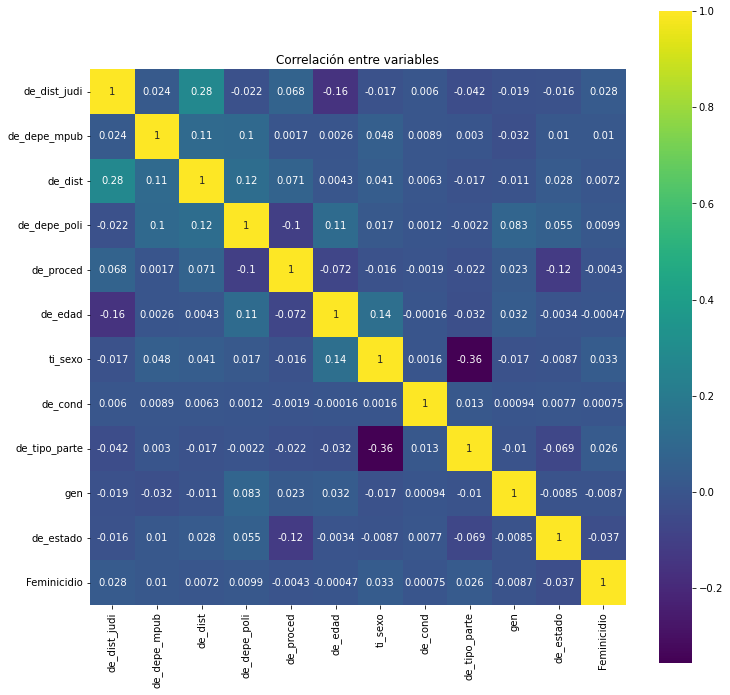

In [30]:
correlation = df2.corr()
plt.figure(figsize=(12,12))
ax = sns.heatmap(correlation, vmax=1, square=True, annot = True, cmap = 'viridis')
plt.title('Correlación entre variables')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x=df2.drop(columns="Feminicidio")
y=df2.Feminicidio

x_train, x_test, y_train, y_test=train_test_split(x,y , random_state=0, test_size=0.30)

In [33]:
model=LogisticRegression(solver='lbfgs',max_iter=10000)

model.fit(x_train, y_train)

predictions=model.predict(x_test)

accuracyTrain=model.score(x_train,y_train)
accuracyTest=model.score(x_test,y_test)

print("Accuracy in Training set: ", accuracyTrain)
print("Accuracy in Testing set: ", accuracyTest)

from sklearn.model_selection import cross_val_score

scores=cross_val_score(model, x_train, y_train, cv=5).mean()

print("Accuracy in cross validation: ", scores)

Accuracy in Training set:  0.941591776243181
Accuracy in Testing set:  0.9408923355381752
Accuracy in cross validation:  0.941591776243181


In [34]:
model.coef_

array([[ 1.69312883e-02,  3.31009065e-04, -7.04591846e-05,
         1.31114465e-04, -7.39645947e-03, -3.00089182e-04,
         2.94952438e-01,  1.89772945e-03,  3.13293049e-01,
        -2.20885628e-02, -4.69067876e-02]])

In [35]:
import statsmodels.api as sm

x_m=sm.add_constant(x_train)

logit=sm.Logit(y_train,x_m)
results=logit.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.220043
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Feminicidio   No. Observations:               634260
Model:                          Logit   Df Residuals:                   634248
Method:                           MLE   Df Model:                           11
Date:                Wed, 22 Jun 2022   Pseudo R-squ.:                 0.01133
Time:                        14:09:37   Log-Likelihood:            -1.3956e+05
converged:                       True   LL-Null:                   -1.4116e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.3336      0.033   -102.105      0.000      -3.398      -3.270
de_dist_judi      0.0172      0.001     22.770      0.000       0.016       0.019
de_depe_mpub      0.0003   5.86e-05      5.799      0.000       0.000       0.000
de_dist       -6.976e-05   1.91e-05     -3.648      0.000      -0.000   -3.23e-05
de_depe_poli      0.0001   1.69e-05      7.963      0.000       0.000       0.000
de_proced        -0.0072      0.001     -5.712      0.000      -0.010      -0.005
de_edad          -0.0002      0.000     -2.324      0.020      -0.000   -3.88e-05
ti_sexo           0.2883      0.008     35.281      0.000       0.272       0.304
de_cond           0.2709      0.756      0.358      0.720      -1.211       1.753
de_tipo_parte     0.3156      0.011     29.780      0.000       0.295       0.336
gen              -0.0254      0.004     -6.945      0.000      -0.033      -0.018
de_estado        -0.0468      0.002    -28.682      0.000      -0.050      -0.044
=================================================================================
"""

In [39]:
x_test_m=sm.add_constant(x_test)

pred_train=results.predict(x_m)

pred_train=pred_train.apply(lambda x:1 if x>0.5 else 0)

pred_test=results.predict(x_test_m)

pred_test=pred_test.apply(lambda x:1 if x>0.5 else 0)

accuracyTrain=accuracy_score(y_train, pred_train)
accuracyTest=accuracy_score(y_test, pred_test)

print("Accuracy in Training set: ", accuracyTrain)

print("Accuracy in Testing set: ", accuracyTest)

Accuracy in Training set:  0.941591776243181
Accuracy in Testing set:  0.9408923355381752


In [40]:
model.fit(x_train,y_train).score(x_test,y_test)

0.9408923355381752

In [36]:
x_m.columns

Index(['const', 'de_dist_judi', 'de_depe_mpub', 'de_dist', 'de_depe_poli',
       'de_proced', 'de_edad', 'ti_sexo', 'de_cond', 'de_tipo_parte', 'gen',
       'de_estado'],
      dtype='object')

In [37]:
logit_glm=sm.GLM(y_train, x_m, family=sm.families.Binomial()).fit()
logit_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Feminicidio   No. Observations:               634260
Model:                            GLM   Df Residuals:                   634248
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3956e+05
Date:                Wed, 22 Jun 2022   Deviance:                   2.7913e+05
Time:                        14:10:07   Pearson chi2:                 6.32e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.3336      0.033   -102.105      0.000      -3.398      -3.270
de_dist_judi      0.0172      0.001     22.770      0.000       0.016       0.019
de_depe_mpub      0.0003   5.86e-05      5.799      0.000       0.000       0.000
de_dist       -6.976e-05   1.91e-05     -3.648      0.000      -0.000   -3.23e-05
de_depe_poli      0.0001   1.69e-05      7.963      0.000       0.000       0.000
de_proced        -0.0072      0.001     -5.712      0.000      -0.010      -0.005
de_edad          -0.0002      0.000     -2.324      0.020      -0.000   -3.88e-05
ti_sexo           0.2883      0.008     35.281      0.000       0.272       0.304
de_cond           0.2709      0.756      0.358      0.720      -1.211       1.753
de_tipo_parte     0.3156      0.011     29.780      0.000       0.295       0.336
gen              -0.0254      0.004     -6.945      0.000      -0.033      -0.018
de_estado        -0.0468      0.002    -28.682      0.000      -0.050      -0.044
=================================================================================
"""